# Tutorial 1
# Parameter estimation from the weight of Honey-bee hives (Summary)
Here we present the processed data of different honey hives compactly and concisely.
  ## Packages needed : 

In [13]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
import time
import sympy as sp 
from numpy import genfromtxt
#from itertools import cycle
from numpy import random
from scipy import optimize
from numpy import vectorize
from scipy.optimize import fsolve
from scipy.integrate import quad
from collections import defaultdict
from tabulate import tabulate
import scipy.optimize
from sklearn.linear_model import LinearRegression
from src.source_codes import* 

## 1. Model:

The model of the weight $W$ of Honey-bee hives as a function of $t$ is retrieved using the Wfunc function:   $W(t)=Wfunc(t,a1,a2,d,m,Nmax,w,W_0,l)$. The input parameters must be given in the re-scaled (normalized) time scales.

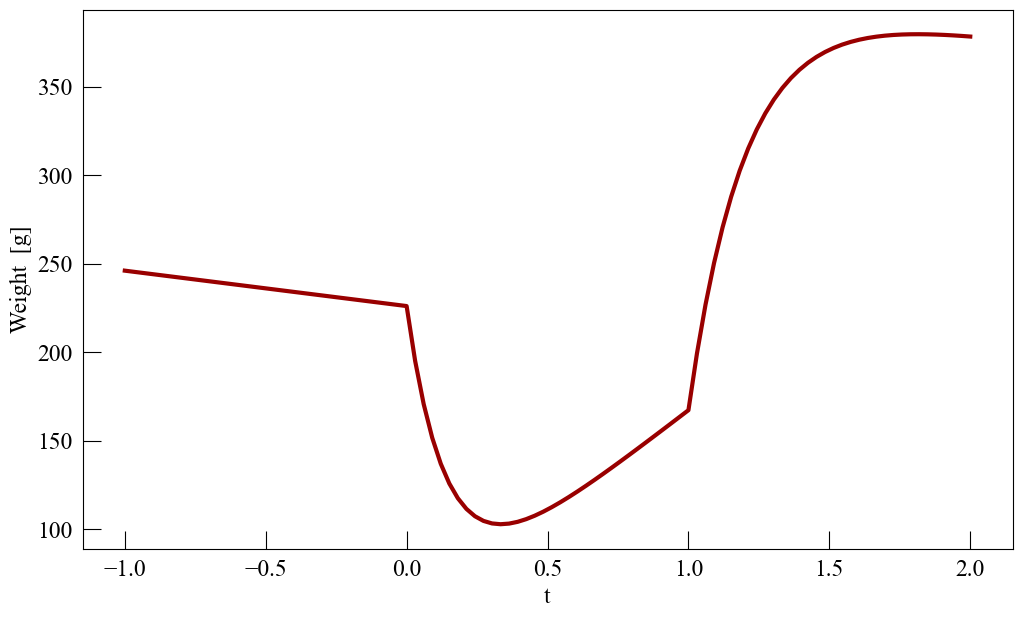

In [14]:
t=np.linspace(start=-1, stop=2, num=100)
Nmax= 2000   #bees
w=    0.113  #g
W0=   0  #g
m=    0.05  #g
a1=   2   #[1/day_cycle]
a2=   5  #[1/day_cycle]
d=    5   #[1/day_cycle]
l=    20 #[1/day_cycle]
Wmodel=Wfunc(t,a1,a2,d,m,Nmax,w,W0,l)


fig=plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.plot(t, Wmodel ,color ="#990000", linestyle='-',linewidth=3.0) #..Plotting W
ax1.set_ylabel('Weight  [g]',fontname="Times New Roman",fontsize=17)
ax1.set_xlabel('t',fontname="Times New Roman",fontsize=17)
            
ax1.tick_params(axis="y",direction="in", pad=7, length=13,labelsize=17)
ax1.tick_params(axis="x",direction="in", pad=7, length=13,labelsize=17)

## 2. Data
2.1 Import data set from '.csv' format:

In [15]:
my_data = genfromtxt('data/Hive_6.csv', delimiter=',')
T_raw= (my_data[:,0])
W_raw=(my_data[:,1])*1000

2.2 Remove consecutive points with a deviation higher than +/-20g. 

In [16]:
T,W= FilterErrors(T_raw,W_raw)

- T: time since midnight (in minutes).
- W: weight of the hive (in grams).

# 3. Parameter inference

3.1 Inference of  $t_0$ and $t_1$:

In [17]:
parameters={}
t0,t1= FitTs(T,W)
parameters["t0"]=t0/60  # Units [h]
parameters["t1"]=t1/60  # Units [h]

Re-scaling time axis considering $t_0$ and $t_1$:

In [18]:
t=Trescaled(T,parameters["t0"],parameters["t1"])

3.2 Inference of robust parameters of the model:
- RobustParameters_1(t,W): To obtain $l$, $A$, and potential $tc$ values.
- RobustParameters_2(t,W,tc): To obtain $\alpha$ and $B$ values.

In [19]:
l,A,tc,W_tc=RobustParameters_1(t,W)
parameters["l_0"]=-l
parameters["A"]=A
parameters["tc"]=tc[0]#0.138#

alpha,B=RobustParameters_2(t,W,parameters["tc"])
parameters["alpha"]=alpha
parameters["B"]=B

3.3 Inference of parameters for fixed $\color{blue}d$ and considering the robust parameters values $l$, $A$, $B$, $\alpha$, and $t_c$.
- fitParameters(t, W, t_0, t_1, $\color{blue}d$, l, A, B, $\alpha$, t_c): To obtain $Nmax$, $W_0$, $a_1$, $a_2$, $d$, $m$, $l$ and $L$.

In [20]:
N,W0,a1,a2,d,m,l_f,Error=fitParameters(t,W,parameters["t0"],parameters["t1"],0.854,parameters["l_0"],parameters["A"],parameters["B"],parameters["alpha"],parameters["tc"])

final_parameters={}
final_parameters["a1"]=a1
final_parameters["a2"]=a2
final_parameters["d"]=d
final_parameters["m"]=m
final_parameters["l"]=l_f
final_parameters["N"]=N
final_parameters["W0"]=W0

3.4 Displaying the results

Arrange the normalized model parameters in an array called 'result'.

In [21]:
w_bee=0.113
scale=parameters["t1"]-parameters["t0"]
result=np.array([a1*scale,a2*scale,d*scale,m,N,w_bee,W0,l_f*scale])

Plot the results and the imported data.

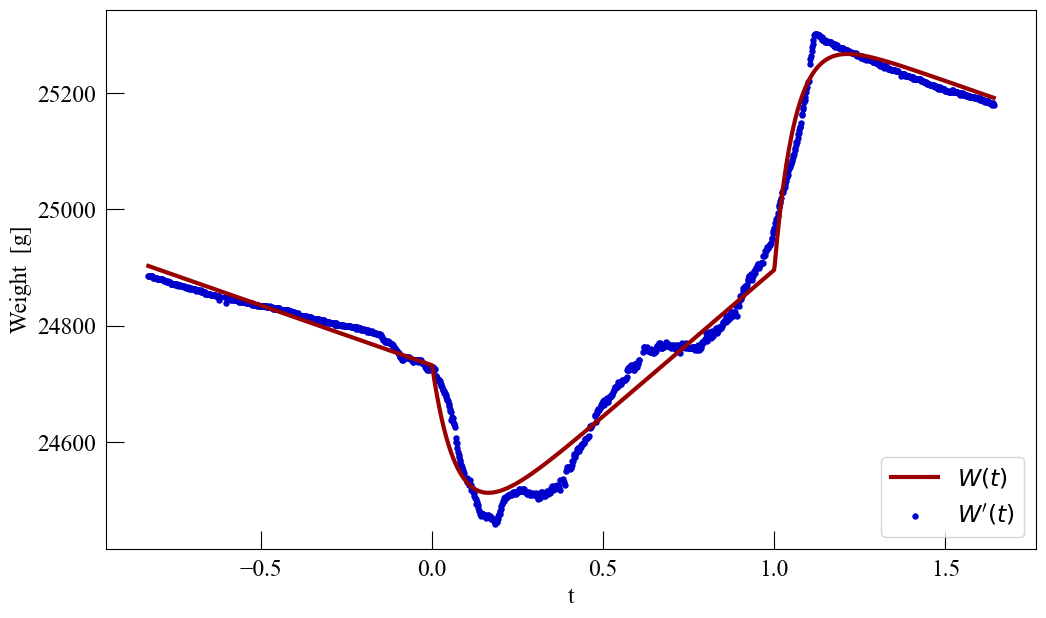

In [22]:
fig=plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

    
ax1.plot(t, Wfunc(t, *result) ,color ="#990000", linestyle='-',linewidth=3.0) #..Plotting our results
ax1.scatter(t,W,color ="#0000CD",s=13) #.........................................Plotting original data
   
ax1.legend([ "$W(t)$","$W'(t)$"], loc ="lower right",fontsize=17)
ax1.set_ylabel('Weight  [g]',fontname="Times New Roman",fontsize=17)
ax1.set_xlabel('t',fontname="Times New Roman",fontsize=17)
            
ax1.tick_params(axis="y",direction="in", pad=7, length=13,labelsize=17)
ax1.tick_params(axis="x",direction="in", pad=7, length=13,labelsize=17)

Computing the error $L$:

In [23]:
Err_unit=np.sum((W-Wfunc(t, *result))**2)/len(W)
print("Error=",Err_unit)
final_parameters["Error"]=Err_unit

Error= 632.3485091758314


Results of the parameters' inference were saved as "final_parameters" for future re-calling. 

In [24]:
final_parameters

{'a1': 0.5192,
 'a2': 1.6966,
 'd': 0.8539,
 'm': 0.0555,
 'l': 21.2281,
 'N': 4085.0,
 'W0': 24270.311,
 'Error': 632.3485091758314}